In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import itertools
%matplotlib inline

## About the dataset

This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:


| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


In [2]:
fileURL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'
loanTraindf = pd.read_csv(fileURL)
loanTraindf.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### Pre-processing (Cleaning)

In [3]:
loanTraindf = loanTraindf.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
loanTraindf.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
loanTraindf['education'] = loanTraindf['education'].astype('category')
loanTraindf['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [5]:
EducationMap = {'college': 'Bachelor', 'Bechalor': 'Bachelor', 'High School or Below':'HighSchool'}
loanTraindf['education'] = loanTraindf['education'].map(EducationMap)
loanTraindf = loanTraindf.dropna()
loanTraindf['education'].value_counts()

Bachelor      193
HighSchool    151
Name: education, dtype: int64

In [6]:
loanTraindf['due_date'] = pd.to_datetime(loanTraindf['due_date'])
loanTraindf['effective_date'] = pd.to_datetime(loanTraindf['effective_date'])
loanTraindf.head()


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,HighSchool,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,Bachelor,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,Bachelor,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,Bachelor,male


In [7]:
loanTraindf['loan_status'].value_counts()


PAIDOFF       259
COLLECTION     85
Name: loan_status, dtype: int64

In [8]:
loanTraindf['daysToPay'] = loanTraindf['due_date'] - loanTraindf['effective_date']
loanTraindf['daysToPay']=loanTraindf['daysToPay']/np.timedelta64(1,'D')
loanTraindf.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,daysToPay
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,HighSchool,male,29.0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,female,29.0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,Bachelor,male,14.0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,Bachelor,female,29.0
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,Bachelor,male,29.0


### Data Visualization

Not surprisingly, it seems that the higher the loan, the less likely is to get paid

In [9]:
loanTraindf['loan_status'].value_counts()

PAIDOFF       259
COLLECTION     85
Name: loan_status, dtype: int64

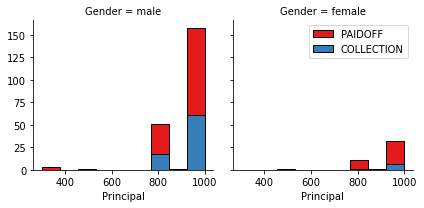

In [10]:
import seaborn as sns

bins = np.linspace(loanTraindf.Principal.min(), loanTraindf.Principal.max(), 10)
g = sns.FacetGrid(loanTraindf, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Age seems to follow the same proportion of paid/unpaid proportion.

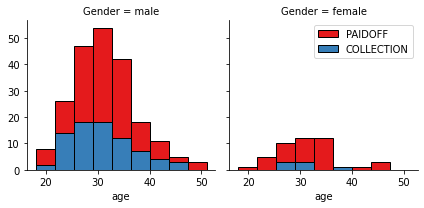

In [11]:
bins = np.linspace(loanTraindf.age.min(), loanTraindf.age.max(), 10)
g = sns.FacetGrid(loanTraindf, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

The sweet spot for the duration of a loan seems to be less than 20 days. Overall it's more likley that the longer the loan, the less likely is to get it paid.  

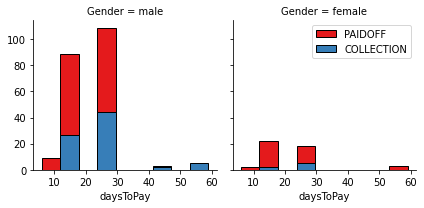

In [12]:
bins = np.linspace(loanTraindf.daysToPay.min(), loanTraindf.daysToPay.max(), 10)
g = sns.FacetGrid(loanTraindf, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'daysToPay', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off

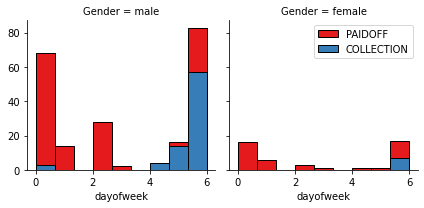

In [13]:
loanTraindf['dayofweek'] = loanTraindf['effective_date'].dt.dayofweek
bins = np.linspace(loanTraindf.dayofweek.min(), loanTraindf.dayofweek.max(), 10)
g = sns.FacetGrid(loanTraindf, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


There is not a significant difference in education the loan payment

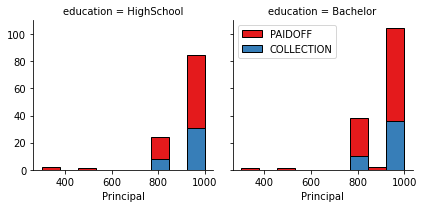

education   loan_status
Bachelor    PAIDOFF        0.761658
            COLLECTION     0.238342
HighSchool  PAIDOFF        0.741722
            COLLECTION     0.258278
Name: loan_status, dtype: float64


In [14]:
bins = np.linspace(loanTraindf.Principal.min(), loanTraindf.Principal.max(), 10)
g = sns.FacetGrid(loanTraindf, col="education", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

print(loanTraindf.groupby(['education'])['loan_status'].value_counts(normalize=True))

## Pre-processing (Feature Selection)

In [15]:
loanTraindf['weekend'] = loanTraindf['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
loanTraindf['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
loanTraindf['education'].replace(to_replace=['HighSchool','Bachelor'], value=[0,1],inplace=True)
loanTraindf['loan_status'].replace(to_replace=['COLLECTION', 'PAIDOFF'], value=[0,1],inplace=True)
loanTraindf.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,daysToPay,dayofweek,weekend
0,1,1000,30,2016-09-08,2016-10-07,45,0,0,29.0,3,0
1,1,1000,30,2016-09-08,2016-10-07,33,1,1,29.0,3,0
2,1,1000,15,2016-09-08,2016-09-22,27,1,0,14.0,3,0
3,1,1000,30,2016-09-09,2016-10-08,28,1,1,29.0,4,1
4,1,1000,30,2016-09-09,2016-10-08,29,1,0,29.0,4,1


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

FeatureNames_knn = ['Principal','terms','age','Gender','education','daysToPay','weekend','dayofweek']
Features_knn = loanTraindf[FeatureNames_knn]
y = loanTraindf['loan_status'].values

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    X_train, X_test, y_train, y_test = train_test_split( Features_knn, y, test_size=0.3, random_state=4)
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

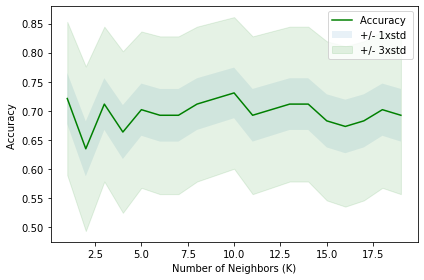

The best accuracy was with 0.7307692307692307 with k= 10


In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

kTrain = mean_acc.argmax()+1

### Creating model with the best accuracy with the whole train dataset

In [18]:
KNN_Model = KNeighborsClassifier(n_neighbors = kTrain).fit(Features_knn,y)

# Decision Tree


In [19]:
from sklearn.tree import DecisionTreeClassifier
# featureNames =['Principal','terms','age','Gender','daysToPay','weekend']
# Principal terms age education Gender daysToPay dayofweek weekend
FeatureNames_DT = ['Principal','terms','age','Gender','education']
Features_DT = loanTraindf[FeatureNames_DT]
y = loanTraindf['loan_status'].values
depth = 20
mean_acc = np.zeros((depth-1))
std_acc = np.zeros((depth-1))

for n in range(2,depth):
    X_train, X_test, y_train, y_test = train_test_split( Features_DT, y, test_size=0.3, random_state=4)
    #Train Model and Predict  
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    drugTree.fit(X_train,y_train)

    yhat=drugTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

depthUse = mean_acc.argmax()+1
depthUse  

6

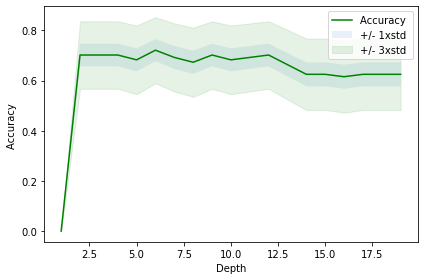

The best accuracy was with 0.7211538461538461 with k= 6


In [20]:
plt.plot(range(1,depth),mean_acc,'g')
plt.fill_between(range(1,depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,depth),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [21]:
dTree_Model = DecisionTreeClassifier(criterion="entropy", max_depth = depthUse)
dTree_Model.fit(Features_DT, y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

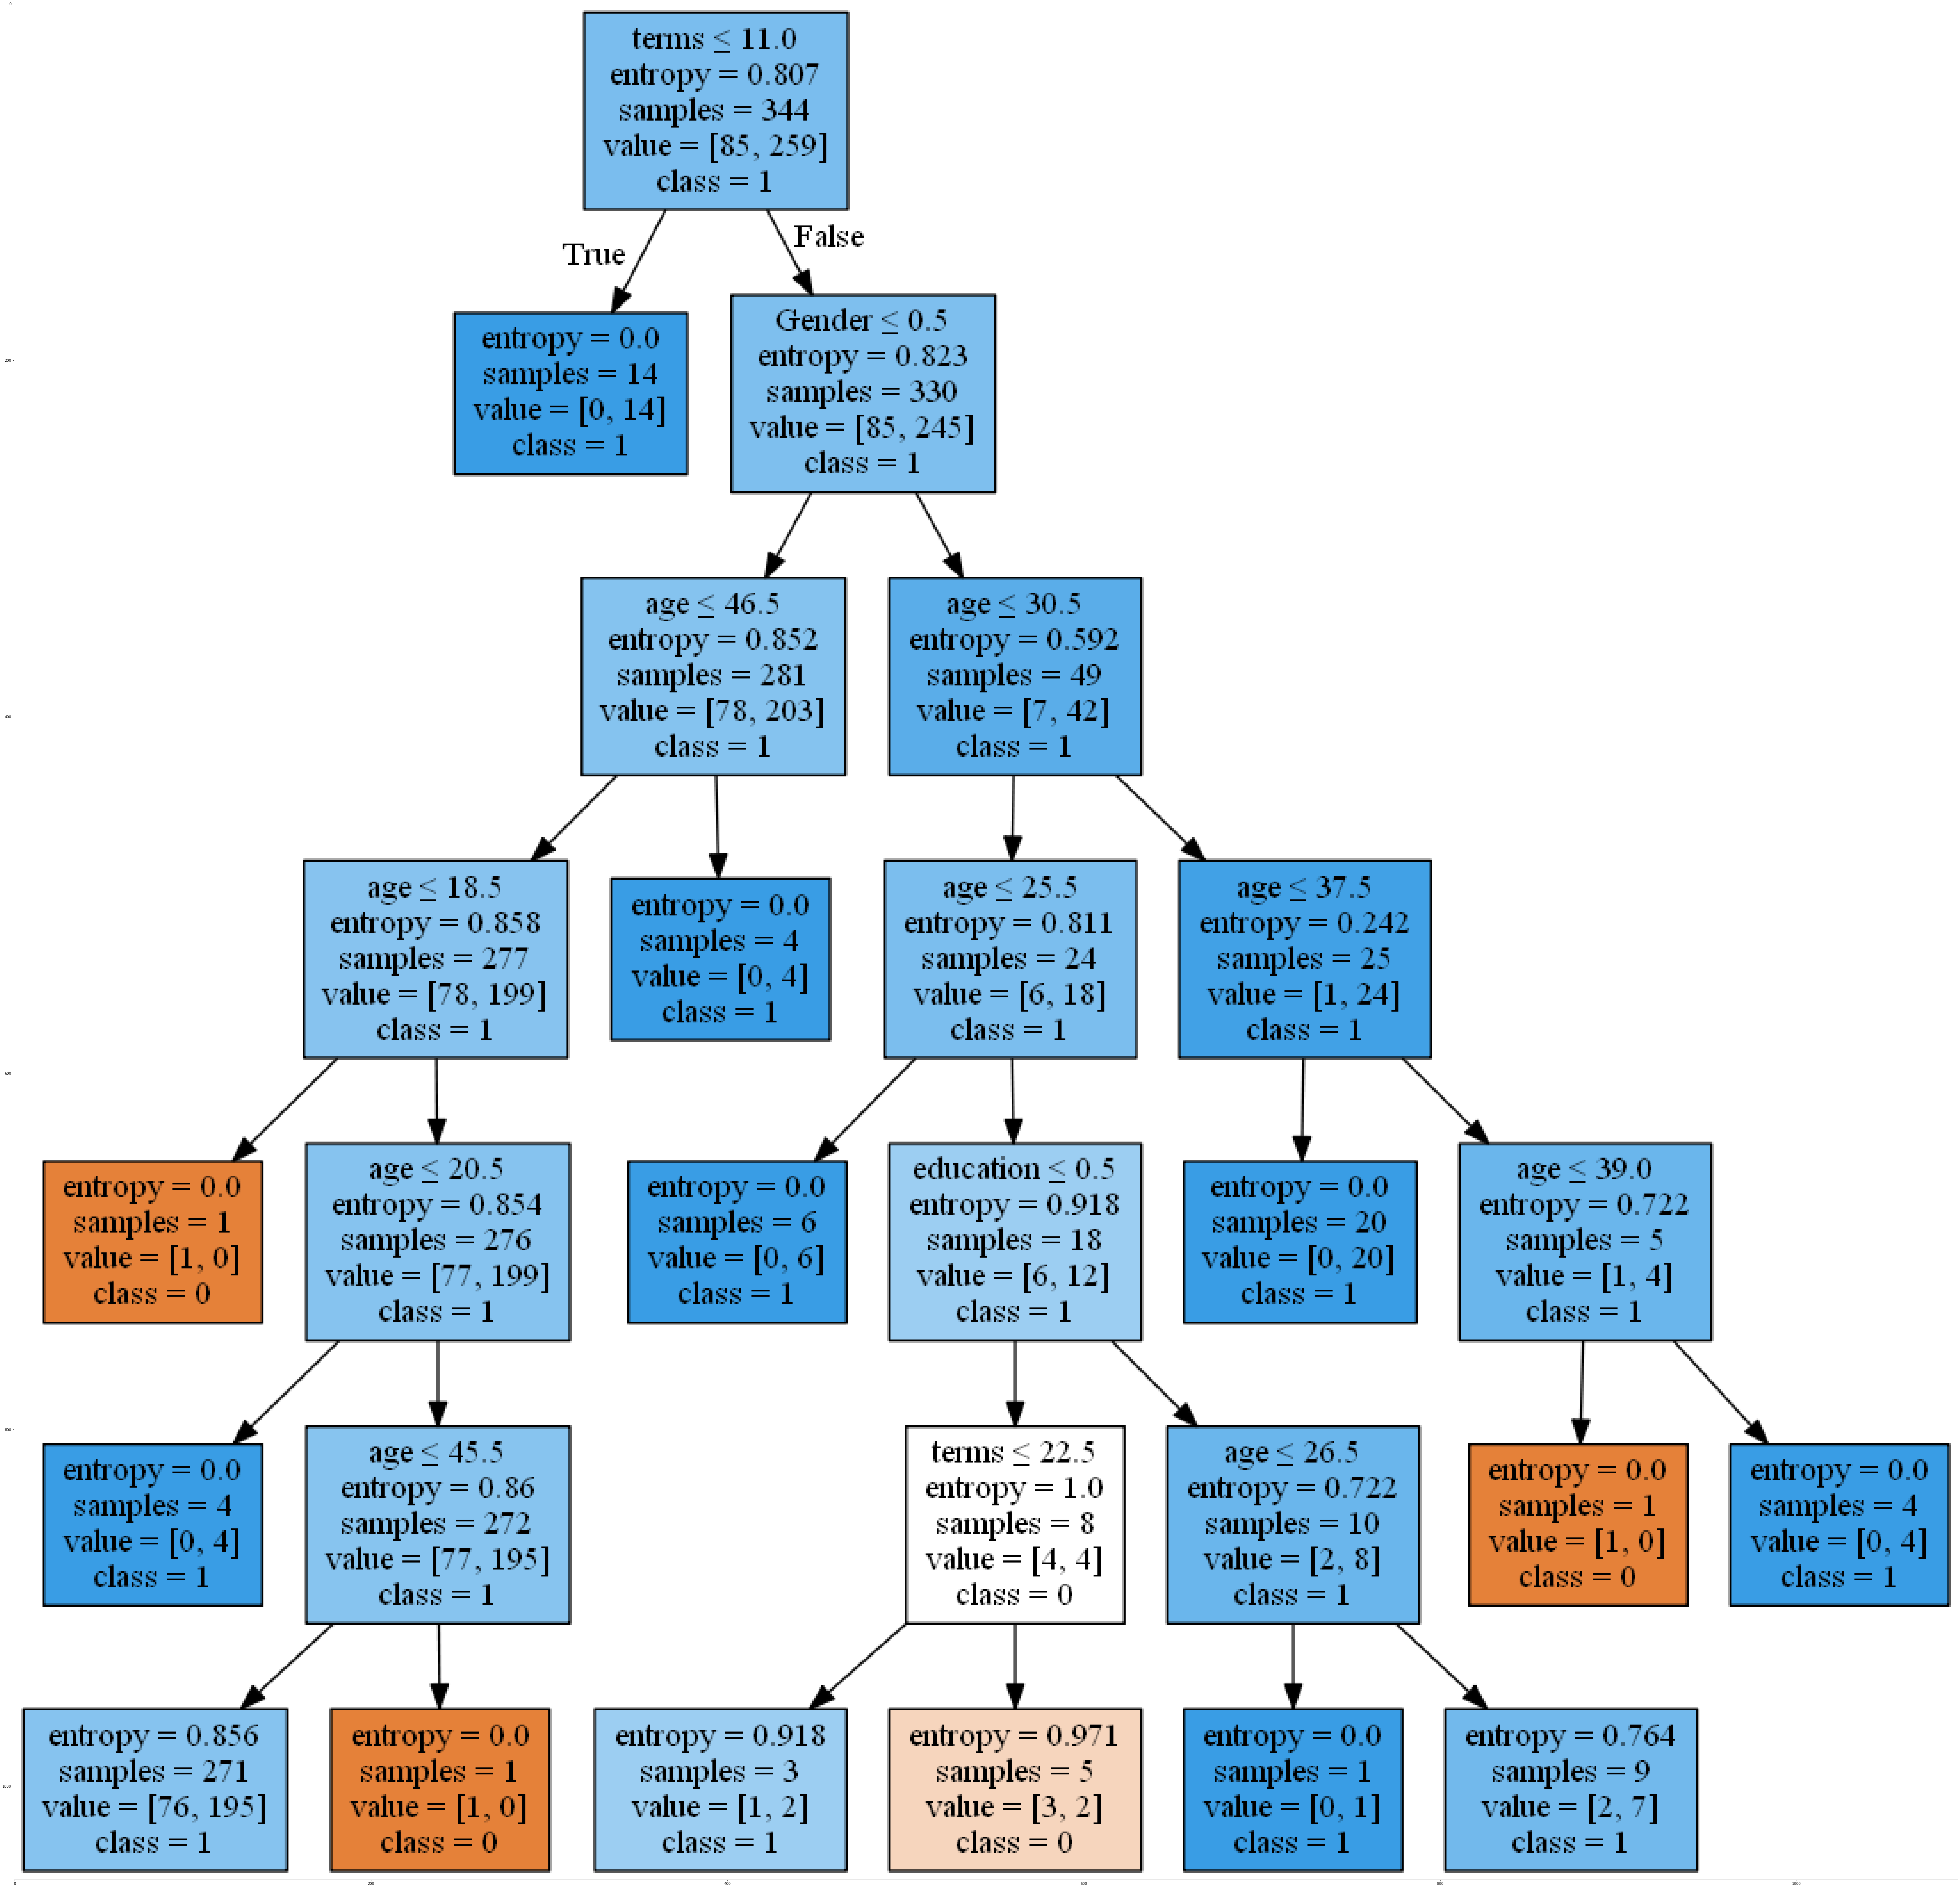

In [22]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
y_s =  [str(elem) for elem in y ]
dot_data = StringIO()
filename = "drugtree.png"

out=tree.export_graphviz(dTree_Model,feature_names=FeatureNames_DT, out_file=dot_data, class_names= np.unique(y_s), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

Gender
dayofweek


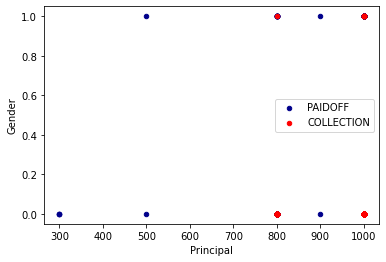

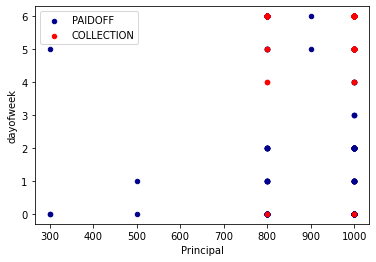

In [23]:
featureNames_svm = [ 'Gender','dayofweek']
for feature in featureNames_svm:
    ax = loanTraindf[loanTraindf['loan_status'] == 1].plot(kind='scatter', x='Principal', y=feature, color='DarkBlue', label='PAIDOFF');
    loanTraindf[loanTraindf['loan_status'] == 0].plot(kind='scatter', x='Principal', y=feature, color='Red', label='COLLECTION', ax=ax);
    print (feature)

# ax = loanTraindf[loanTraindf['loan_status'] == 1].plot(kind='scatter', x='Principal', y='terms', color='DarkBlue', label='PAIDOFF');
# loanTraindf[loanTraindf['loan_status'] == 0].plot(kind='scatter', x='Principal', y='terms', color='Red', label='COLLECTION', ax=ax);
plt.show()

In [24]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Features_svm = loanTraindf[featureNames_svm]
#'Principal', 'terms', 'age', 'education', 'Gender', 'daysToPay', 'dayofweek', 'weekend'
X = np.asarray(Features_svm)
y = np.asarray(y_s)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=2)

clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
  

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.33      0.33      0.33        24
           1       0.80      0.80      0.80        80

    accuracy                           0.69       104
   macro avg       0.57      0.57      0.57       104
weighted avg       0.69      0.69      0.69       104

Confusion matrix, without normalization
[[ 8 16]
 [16 64]]


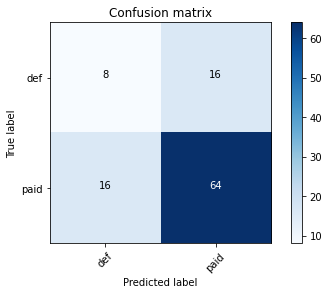

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['0','1'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['def','paid'],normalize= False,  title='Confusion matrix')

#### Create model using the whole training set

In [27]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X, y)

SVC(kernel='sigmoid')

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
featureNames_LR = ['Principal', 'terms', 'age', 'education', 'Gender', 'daysToPay', 'dayofweek', 'weekend']
Features_LR = loanTraindf[featureNames_LR]
X = preprocessing.StandardScaler().fit(Features_LR).transform(Features_LR)
y = loanTraindf['loan_status'].values

y_str =  [str(elem) for elem in y ]
#'Principal', 'terms', 'age', 'education', 'Gender', 'daysToPay', 'dayofweek', 'weekend'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# print(X_train, y_train)

# print(X_test, y_test)


LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
yhat = LR.predict(X_test)

yhat_prob = LR.predict_proba(X_test)

In [29]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=1)

0.6808510638297872

              precision    recall  f1-score   support

           0       0.53      0.32      0.40        31
           1       0.75      0.88      0.81        73

    accuracy                           0.71       104
   macro avg       0.64      0.60      0.61       104
weighted avg       0.69      0.71      0.69       104

Confusion matrix, without normalization
[[10 21]
 [ 9 64]]


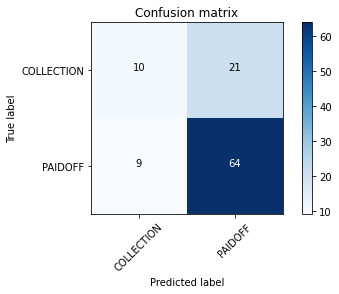

In [30]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')

Build Logistic model with the whole training set

In [31]:
LR_t = LogisticRegression(C=0.01, solver='liblinear').fit(X, y)

# Model Evaluation using Test set


## Preprocess Test dataset to match changes to training set

In [32]:
testURL = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'
dfTest = pd.read_csv(testURL)
dfTest.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [33]:
dfTest = dfTest.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
dfTest.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [34]:
dfTest['education'] = dfTest['education'].astype('category')
dfTest['education'].value_counts()

college                 23
High School or Below    21
Bechalor                 8
Master or Above          2
Name: education, dtype: int64

In [35]:
EducationMap = {'college': 'Bachelor', 'Bechalor': 'Bachelor', 'High School or Below':'HighSchool'}
dfTest['education'] = dfTest['education'].map(EducationMap)
dfTest = dfTest.dropna()
dfTest['education'].value_counts()

Bachelor      31
HighSchool    21
Name: education, dtype: int64

In [36]:
dfTest['due_date'] = pd.to_datetime(dfTest['due_date'])
dfTest['effective_date'] = pd.to_datetime(dfTest['effective_date'])
dfTest['dayofweek'] = dfTest['effective_date'].dt.dayofweek
dfTest['daysToPay'] = dfTest['due_date'] - dfTest['effective_date']
dfTest['daysToPay']=dfTest['daysToPay']/np.timedelta64(1,'D')
dfTest.head()


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,daysToPay
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bachelor,female,3,29.0
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,HighSchool,female,5,29.0
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,Bachelor,male,5,29.0
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bachelor,male,6,14.0
5,PAIDOFF,700,15,2016-09-11,2016-09-25,33,HighSchool,male,6,14.0


In [37]:
dfTest['weekend'] = dfTest['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
dfTest['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
dfTest['education'].replace(to_replace=['HighSchool','Bachelor'], value=[0,1],inplace=True)
dfTest['loan_status'].replace(to_replace=['COLLECTION', 'PAIDOFF'], value=[0,1],inplace=True)
dfTest.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,daysToPay,weekend
0,1,1000,30,2016-09-08,2016-10-07,50,1,1,3,29.0,0
2,1,1000,30,2016-09-10,2016-10-09,43,0,1,5,29.0,1
3,1,1000,30,2016-09-10,2016-10-09,26,1,0,5,29.0,1
4,1,800,15,2016-09-11,2016-09-25,29,1,0,6,14.0,1
5,1,700,15,2016-09-11,2016-09-25,33,0,0,6,14.0,1


## KNN Evaluation

In [38]:
FeaturesTest_knn = dfTest[FeatureNames_knn]
y_test = dfTest['loan_status'].values

yhat = KNN_Model.predict(FeaturesTest_knn)
jaccard_knn = jaccard_score(y_test, yhat, pos_label=1)

In [39]:
from sklearn.metrics import f1_score
f1_knn = f1_score(y_test, yhat, average='weighted')

## Decission Tree evaluation

In [40]:
FeaturesTest_DT = dfTest[FeatureNames_DT]
y_test = dfTest['loan_status'].values

yhat = dTree_Model.predict(FeaturesTest_DT)
jaccard_DT = jaccard_score(y_test, yhat, pos_label=1)
f1_DT = f1_score(y_test, yhat, average='weighted')

## SVM Evaluation

In [41]:
Features_svm = dfTest[featureNames_svm]
y_s =  [str(elem) for elem in y_test ]
#'Principal', 'terms', 'age', 'education', 'Gender', 'daysToPay', 'dayofweek', 'weekend'
X_test = np.asarray(Features_svm)
y_test = np.asarray(y_s)

yhat = clf.predict(X_test)

In [42]:
jaccard_svm = jaccard_score(y_test, yhat, pos_label='1')
f1_svm = f1_score(y_test, yhat, average='weighted')

## Logistic Evaluation

In [43]:
Features_LR = dfTest[featureNames_LR]
X = preprocessing.StandardScaler().fit(Features_LR).transform(Features_LR)
y_test = dfTest['loan_status'].values

yhat = LR_t.predict(X)

yhat_prob = LR_t.predict_proba(X)

In [44]:
from sklearn.metrics import log_loss
jaccard_lr = jaccard_score(y_test, yhat, pos_label=1)
f1_lr = f1_score(y_test, yhat, average='weighted')
log_lr = log_loss(y_test, yhat_prob)

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | {{ jaccard_knn }}       | {{ f1_knn }}        | NA      |
| Decision Tree      | {{ jaccard_DT }}       | {{ f1_DT }}       | NA      |
| SVM                | {{ f1_svm }}       | {{ f1_svm }}        | NA      |
| LogisticRegression | {{ f1_lr }}       | {{ f1_lr }}         | {{ log_lr }}       |
